#Customer Churn Prediction: Develop a model to predict customer churn in a subscription-based business.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix
import pickle

In [34]:
df=pd.read_csv('/content/drive/MyDrive/customer_churn_dataset.csv')
df.head()

,CustomerID,Gender,Age,Tenure_Months,SubscriptionType,MonthlyCharges,TotalCharges,PaymentMethod,SupportTickets,ContractType,Churn
0,CUST1000,Male,49,54,Standard,99.33,4912.77,Net Banking,1,Two Year,0
1,CUST1001,Female,56,8,Standard,12.01,604.59,Debit Card,2,Two Year,0
2,CUST1002,Male,66,27,Basic,57.62,2019.39,Cash,4,Two Year,0
3,CUST1003,Male,69,27,Premium,97.08,4848.88,Credit Card,7,Two Year,0
4,CUST1004,Male,49,34,Standard,54.69,4334.26,Credit Card,9,One Year,1


In [35]:
print("Shape:",df.shape)
df.info()
df.describe()


Shape: (200, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        200 non-null    object 
 1   Gender            200 non-null    object 
 2   Age               200 non-null    int64  
 3   Tenure_Months     200 non-null    int64  
 4   SubscriptionType  200 non-null    object 
 5   MonthlyCharges    200 non-null    float64
 6   TotalCharges      200 non-null    float64
 7   PaymentMethod     200 non-null    object 
 8   SupportTickets    200 non-null    int64  
 9   ContractType      200 non-null    object 
 10  Churn             200 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 17.3+ KB


,Age,Tenure_Months,MonthlyCharges,TotalCharges,SupportTickets,Churn
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,44.405000,31.925000,51.348250,2536.105100,4.505000,0.285000
std,15.353816,16.390933,27.570371,1408.107184,2.967153,0.452547
min,18.000000,1.000000,6.380000,72.930000,0.000000,0.000000
25%,32.750000,21.000000,27.335000,1292.312500,2.000000,0.000000
50%,46.000000,32.000000,50.530000,2537.170000,4.000000,0.000000
75%,56.000000,46.250000,73.062500,3753.577500,7.000000,1.000000
max,69.000000,58.000000,99.970000,4984.530000,9.000000,1.000000


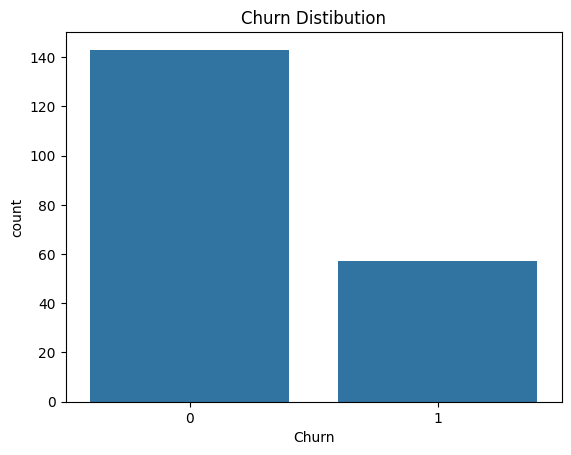

In [36]:
sns.countplot(x='Churn',data=df)
plt.title("Churn Distibution")
plt.show()

In [37]:
df=df.drop("CustomerID",axis=1)
df=pd.get_dummies(df,drop_first=True)
df.head()

,Age,Tenure_Months,MonthlyCharges,TotalCharges,SupportTickets,Churn,Gender_Male,SubscriptionType_Premium,SubscriptionType_Standard,PaymentMethod_Credit Card,PaymentMethod_Debit Card,PaymentMethod_Net Banking,PaymentMethod_UPI,ContractType_One Year,ContractType_Two Year
0,49,54,99.33,4912.77,1,0,True,False,True,False,False,True,False,False,True
1,56,8,12.01,604.59,2,0,False,False,True,False,True,False,False,False,True
2,66,27,57.62,2019.39,4,0,True,False,False,False,False,False,False,False,True
3,69,27,97.08,4848.88,7,0,True,True,False,True,False,False,False,False,True
4,49,34,54.69,4334.26,9,1,True,False,True,True,False,False,False,True,False


In [38]:
X=df.drop(["Churn"],axis=1)
y=df["Churn"]

X.head(),y.head()

(   Age  Tenure_Months  MonthlyCharges  TotalCharges  SupportTickets  \
 0   49             54           99.33       4912.77               1   
 1   56              8           12.01        604.59               2   
 2   66             27           57.62       2019.39               4   
 3   69             27           97.08       4848.88               7   
 4   49             34           54.69       4334.26               9   
 
    Gender_Male  SubscriptionType_Premium  SubscriptionType_Standard  \
 0         True                     False                       True   
 1        False                     False                       True   
 2         True                     False                      False   
 3         True                      True                      False   
 4         True                     False                       True   
 
    PaymentMethod_Credit Card  PaymentMethod_Debit Card  \
 0                      False                     False   
 1            

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("Train size:",X_train.shape)
print("Test size:",X_test.shape)


Train size: (160, 14)
Test size: (40, 14)


In [42]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
with open("model","wb") as f:
    pickle.dump(model,f)



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [46]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))


Accuracy: 0.75
Precision: 0.2857142857142857
Recall: 0.2857142857142857
F1 Score: 0.2857142857142857


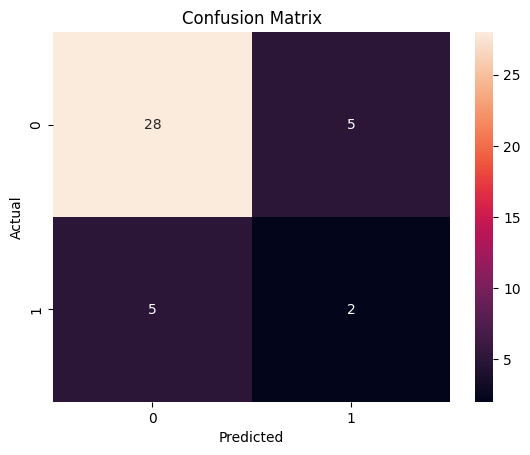

In [48]:
cm=confusion_matrix(y_test,y_pred)

sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


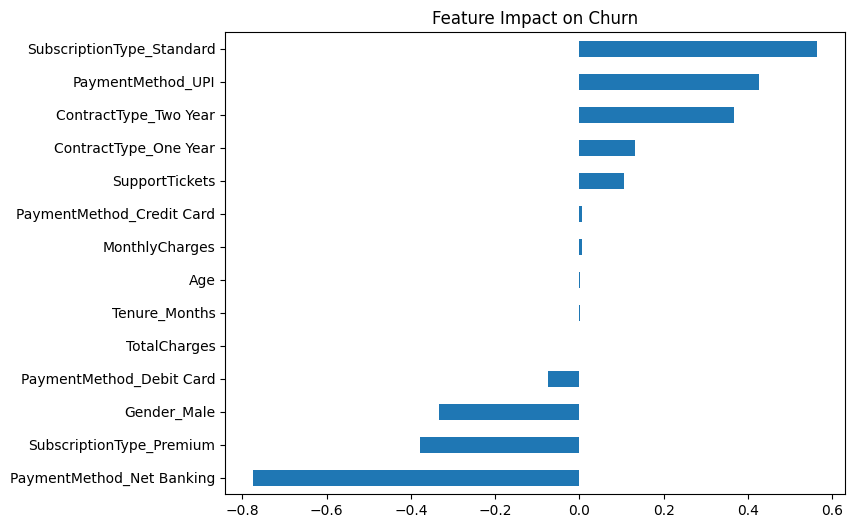

In [49]:
coef=pd.Series(model.coef_[0],index=X_train.columns)
coef.sort_values().plot(kind="barh",figsize=(8,6))
plt.title("Feature Impact on Churn")
plt.show()
